In [29]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_16344\1649430976.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [30]:
def parser(i):
    return datetime.strptime(i, '%Y-%m-%d %H:%M:%S')

x = pd.read_csv('./data/AirQualityUCI_refined.csv', index_col=[0], parse_dates=[0], date_parser=parser)
air.head()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


Datetime
2004-03-10 18:00:00    1056.0
2004-03-10 19:00:00    1174.0
2004-03-10 20:00:00    1140.0
2004-03-10 21:00:00    1092.0
2004-03-10 22:00:00    1205.0
Name: PT08.S3(NOx), dtype: float64


<AxesSubplot:xlabel='Datetime'>

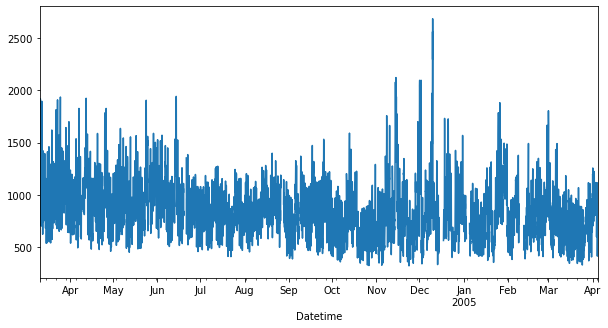

In [31]:
output = x["PT08.S3(NOx)"].copy()
print(output.head())
output.plot(figsize=(10,5))

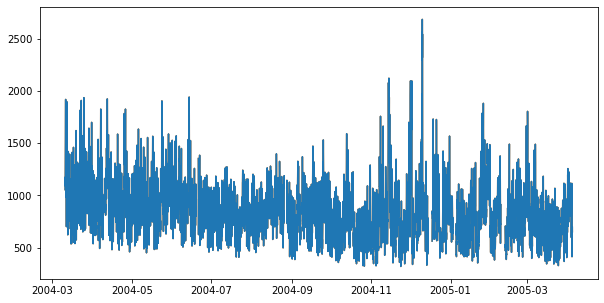

In [32]:
pt.interpolate(inplace=True)

plt.figure(figsize=(10,5))
plt.plot(x["PT08.S3(NOx)"], zorder=2)
plt.plot(output, zorder=1)

Text(0.5, 0, 'PT08.S3(NOx)')

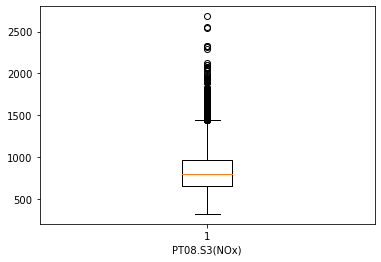

In [33]:
plt.boxplot(pt)
plt.xlabel("PT08.S3(NOx)")

In [34]:
q1 = output.quantile(0.25)
q2 = output.median()
q3 = output.quantile(0.75)

iqr = q3-q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr

print(q1 ,q2, q3, iqr)
print(upper_fence, lower_fence)

658.0 806.0 969.5 311.5
1436.75 190.75


In [35]:
outliers_iqr = output.loc[(output>upper_fence)|(output<lower_fence)]
outliers_iqr

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 241, dtype: float64

In [39]:
mask_iqr = output.index.isin(outliers_iqr.index)
mask_iqr[:20]

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False])

In [40]:
output_iqr = output.copy()
output_iqr[mask_iqr] = np.nan
output_iqr

Datetime
2004-03-10 18:00:00    1056.0
2004-03-10 19:00:00    1174.0
2004-03-10 20:00:00    1140.0
2004-03-10 21:00:00    1092.0
2004-03-10 22:00:00    1205.0
                        ...  
2005-04-04 10:00:00     539.0
2005-04-04 11:00:00     604.0
2005-04-04 12:00:00     603.0
2005-04-04 13:00:00     702.0
2005-04-04 14:00:00     654.0
Name: PT08.S3(NOx), Length: 9357, dtype: float64

<AxesSubplot:xlabel='Datetime'>

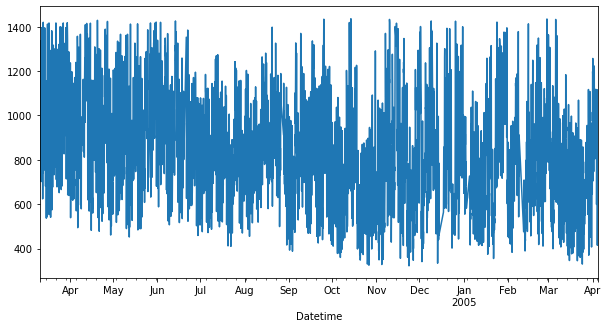

In [41]:
output_iqr.interpolate(inplace=True)
output_iqr.plot(figsize=(10,5))

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S3(NOx)', ylabel='Density'>

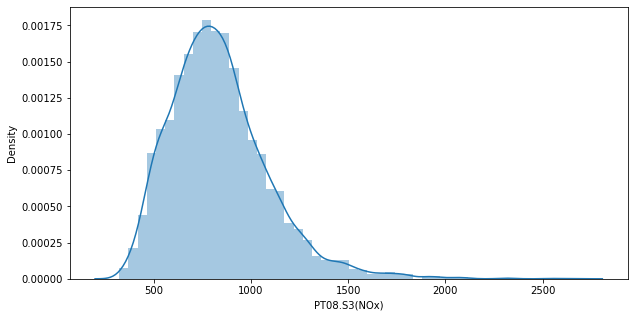

In [42]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.distplot(output)

In [43]:
mean = np.mean(output)
std = np.std(output)
print(mean, std)

835.4936047158269 256.80303770785855


In [44]:
th = 3

outliers_Z = output.loc[np.abs((output-mean)/std) > th]
outliers_Z

Datetime
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
2004-03-11 05:00:00    1918.0
2004-03-11 06:00:00    1738.0
2004-03-12 03:00:00    1680.0
                        ...  
2005-02-28 06:00:00    1665.0
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
Name: PT08.S3(NOx), Length: 109, dtype: float64

In [45]:
mask_Z = pt.index.isin(outliers_Z.index)
mask_Z[:20]

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False])

In [46]:
output_Z = output.copy()
output_Z[mask_Z] = np.nan
output_Z[mask_Z]

Datetime
2004-03-11 03:00:00   NaN
2004-03-11 04:00:00   NaN
2004-03-11 05:00:00   NaN
2004-03-11 06:00:00   NaN
2004-03-12 03:00:00   NaN
                       ..
2005-02-28 06:00:00   NaN
2005-03-01 03:00:00   NaN
2005-03-01 04:00:00   NaN
2005-03-01 05:00:00   NaN
2005-03-01 06:00:00   NaN
Name: PT08.S3(NOx), Length: 109, dtype: float64

<AxesSubplot:xlabel='Datetime'>

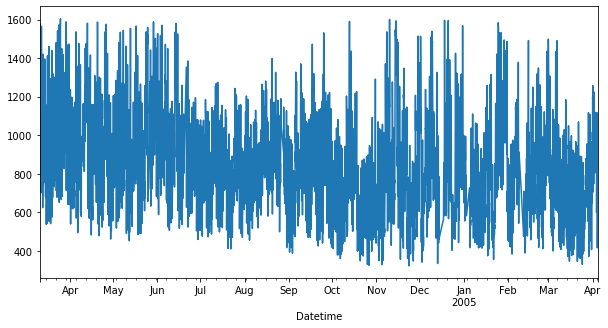

In [47]:
output_Z.interpolate(inplace=True)
output_Z.plot(figsize=(10,5))